In [1]:
# Import the os module
import os

import sys
import time
import pickle
import itertools
import pandas as pd
import numpy as np
import pylab
import warnings
import seaborn as sns

#import statsmodels.api as sm
#import statsmodels.formula.api as smf

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie
#from matplotlib.font_manager import FontProperties
import seaborn as sns

from IPython.display import display, Image
from IPython.core.interactiveshell import InteractiveShell

#%matplotlib inline
#%matplotlib notebook
#matplotlib.rcdefaults()
#matplotlib.verbose.set_level('silent')

data1 = pd.read_csv("h1b_disclosure_data_2015_2019.csv", index_col=False)

In [2]:
!git clone https://github.com/rsouza/FGV_Intro_DS.git

fatal: destination path 'FGV_Intro_DS' already exists and is not an empty directory.


In [29]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857155 entries, 0 to 857212
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CASE_NUMBER          857155 non-null  object 
 1   CASE_STATUS          857155 non-null  object 
 2   EMPLOYER_NAME        857155 non-null  object 
 3   SOC_NAME             857155 non-null  object 
 4   SOC_CODE             857155 non-null  object 
 5   JOB_TITLE            857155 non-null  object 
 6   FULL_TIME_POSITION   857155 non-null  object 
 7   PREVAILING_WAGE      857155 non-null  float64
 8   WORKSITE_CITY        857155 non-null  object 
 9   WORKSITE_STATE_ABB   857155 non-null  object 
 10  YEAR                 857155 non-null  object 
 11  WORKSITE_STATE_FULL  857155 non-null  object 
 12  WORKSITE             857155 non-null  object 
dtypes: float64(1), object(12)
memory usage: 123.8+ MB


In [30]:
data1.info

<bound method DataFrame.info of                CASE_NUMBER          CASE_STATUS  \
0       I-200-09285-514415            CERTIFIED   
1       I-200-09341-564186  CERTIFIED-WITHDRAWN   
2       I-200-09342-274341            CERTIFIED   
3       I-200-09364-425868            CERTIFIED   
4       I-200-10006-413683            WITHDRAWN   
...                    ...                  ...   
857208  I-203-19105-914081            CERTIFIED   
857209  I-200-19043-930707               DENIED   
857210  I-200-19060-000930            CERTIFIED   
857211  I-200-19053-522403            CERTIFIED   
857212  I-200-18282-647333            CERTIFIED   

                                   EMPLOYER_NAME  \
0                                    IT CATS LLC   
1                       XPERT TECHNOLOGIES, INC.   
2                             ISR INFO WAY, INC.   
3           MAGIC CIRCLE FILMS INTERNATIONAL LLC   
4                          SAPHIRE SOLUTIONS INC   
...                                        

In [4]:
data1.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'SOC_CODE',
       'JOB_TITLE', 'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'WORKSITE_CITY',
       'WORKSITE_STATE_ABB', 'YEAR', 'WORKSITE_STATE_FULL', 'WORKSITE'],
      dtype='object')

In [5]:
data1.head()

,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE_CITY,WORKSITE_STATE_ABB,YEAR,WORKSITE_STATE_FULL,WORKSITE
0,I-200-09285-514415,CERTIFIED,IT CATS LLC,COMPUTER SYSTEMS ANALYSTS,15-1121,SENIOR BUSINESS ANALYST,Y,109116.8,"NORTH WALES,",PA,2015,PENNSYLVANIA,"NORTH WALES, PENNSYLVANIA"
1,I-200-09341-564186,CERTIFIED-WITHDRAWN,"XPERT TECHNOLOGIES, INC.","COMPUTER OCCUPATIONS, ALL OTHER*",15-1799,QUALITY ASSURANCE ANALYST,Y,58282.0,CAMP HILL,PA,2015,PENNSYLVANIA,"CAMP HILL, PENNSYLVANIA"
2,I-200-09342-274341,CERTIFIED,"ISR INFO WAY, INC.","SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,SR. SOFTWARE DEVELOPER,Y,84906.0,CHICAGO,IL,2015,ILLINOIS,"CHICAGO, ILLINOIS"
3,I-200-09364-425868,CERTIFIED,MAGIC CIRCLE FILMS INTERNATIONAL LLC,FILM AND VIDEO EDITORS,27-4032,VIDEO EDITOR,Y,39333.0,AUBURN,NY,2015,NEW YORK,"AUBURN, NEW YORK"
4,I-200-10006-413683,WITHDRAWN,SAPHIRE SOLUTIONS INC,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,15-1142,SYSTEMS ADMINISTRATOR,Y,68638.0,BETHPAGE,NY,2015,NEW YORK,"BETHPAGE, NEW YORK"


In [6]:
data1.describe()

,PREVAILING_WAGE,YEAR
count,8.572120e+05,857216.000000
mean,9.540074e+04,2016.997778
std,1.755489e+06,1.404460
min,0.000000e+00,2015.000000
25%,5.851000e+04,2016.000000
50%,7.032500e+04,2017.000000
75%,8.636200e+04,2018.000000
max,2.977853e+08,2019.000000


In [7]:
set(data1["SOC_NAME"])

{'WRITERS AND AUTHORS',
 nan,
 'LIFE, PHYSICAL, AND SOCIAL SCIENCE TECHNICIANS, AL',
 'COST ESTIMATORS',
 'STATISTICIAN',
 'SECRETARIES AND ADMINISTRATIVE ASSISTANTS, EXCEPT',
 'EDUCATION, TRAINING, AND LIBRARY WORKERS, ALL OTHER',
 'SOFTWARE DEVELOPERS, APPLICATIONS, NONR&D',
 'HEALTH AND SAFETY ENGINEERS, EXCEPT MINING SAFETY ENGINEERS AND INSPECTORS',
 'PHYSICAL THERAPIST ASSISTANTS',
 'COMPUTER SOFTWARE ENGINEERS, APPLICATIONS NON R&D',
 'ATHLETES AND SPORTS COMPETITORS',
 'ELECTRONICS ENGINEERS EXCEPT COMPUTER',
 'SOUND ENGINEERING TECHNICIANS',
 'ARCHITECTURAL DRAFTERS',
 'BUSINESS INTELLIGENCE ANALYSTS',
 'OPERATIONS RESEARCH ANALYSTS',
 'DETECTIVES AND CRIMINAL INVESTIGATORS',
 'MOLECULAR AND CELLULAR BIOLOGIST',
 'SOIL AND PLANT SCIENTISTS',
 'SOFTWARE DEVELOPERS,APPLICAITONS',
 'ENVIRONMENTAL SCIENCE AND PROTECTION TECHNICIANS, INCLUDING HEALTH',
 'ENGLISH LANGUAGE &  LIT TEACHERS, POST SECONDARY',
 'COMPUTER SYSTEM ANALYST',
 'SOFTWARE DEVELOPER, SYSTEM SOFTWARE',
 'FIRST-LI

In [8]:
data1.dropna(inplace = True)

In [9]:
data1['SOC_NAME'] = data1['SOC_NAME'].str.replace('  ',' ')
#data1['SOC_NAME'] = data1['SOC_NAME'].str.replace('WORKERS,','WORKERS')

In [10]:
data1.YEAR = data1.YEAR.astype(str)

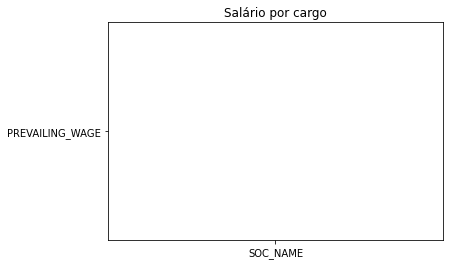

In [11]:
import matplotlib
import matplotlib.pyplot as plt

#print(females["Survived"].value_counts())

#sns.kdeplot(females['Age'], label = 'all females', shade = False, alpha = 0.8)
#sns.kdeplot(survived_females['Age'], label = 'survived females', shade = False, alpha = 0.8)

# label the plot
#plt.xlabel('City', size = 20)
#plt.ylabel('Density', size = 20)
#plt.title('Density Plot of Female Titanic Passengers by Age', size = 20)


#print(data1['SOC_NAME']["PREVAILING_WAGE"].value_counts())

plt.bar('SOC_NAME','PREVAILING_WAGE')
plt.title('Salário por cargo')
#plt.xlabel('SOC_NAME')
#plt.ylabel('PREVAILING_WAGE')
plt.show()

In [12]:
#library(tidyverse)
#library(data.table)
#library(ggplot2)
#library(janitor)
#library(dplyr)
#library(repr) ;
#options(repr.plot.width=10, repr.plot.height = 10)
#options(scipen=999)

#ggplot(data=h1b,aes(x=CASE_STATUS)) +
 # geom_bar(fill="#C3D9B5") +
  #labs(title="Approval/Denial of H-1B Visa's", caption="Data collected by Kaggle user Abeyer",
   #    x="Case status",
    #   y="Count") +
 # theme(plot.title = element_text(hjust = 0.5)) +
 # theme(plot.title = element_text(size=19),
  #      axis.text.x = element_text(size= 13, color = 'black'),
   #     axis.text.y = element_text(size = 13, color = 'black'),
    #   axis.title.y = element_text(size = 14, color = 'black'))

Porcentagem de vistos por classificação:

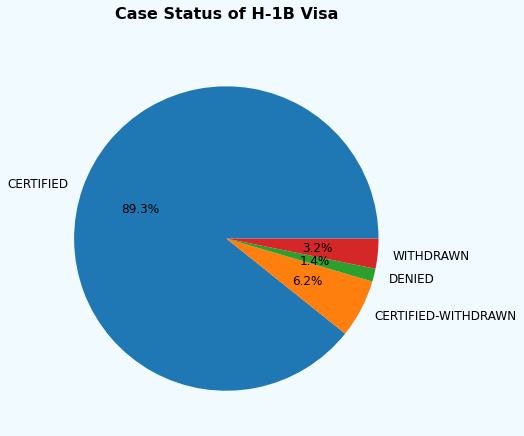

In [13]:
fig = plt.figure(figsize=(7,7))

fig.patch.set_facecolor('#F1FBFF')
fig.patch.set_alpha(1.0)

sums = data1.CASE_NUMBER.groupby(data1.CASE_STATUS).count()
pie(sums, labels=sums.index, autopct='%.1f%%', textprops={'fontsize': 12})

ax1 = plt.title('Case Status of H-1B Visa',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

Porcentagem de vistos por estado:

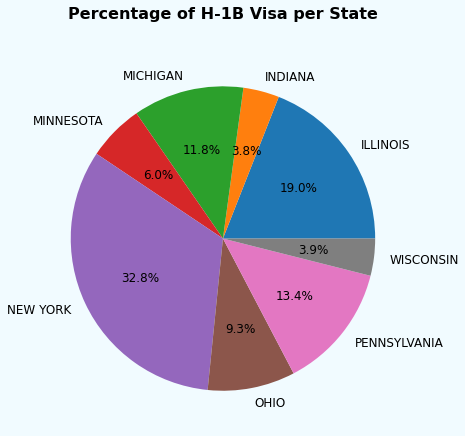

In [14]:
fig = plt.figure(figsize=(7,7))

fig.patch.set_facecolor('#F1FBFF')
fig.patch.set_alpha(1.0)

sums = data1.CASE_NUMBER.groupby(data1.WORKSITE_STATE_FULL).count()
pie(sums, labels=sums.index, autopct='%.1f%%', textprops={'fontsize': 12})

ax1 = plt.title('Percentage of H-1B Visa per State',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

Classificação de casos por ano:

<AxesSubplot:title={'center':'H1Bs by year'}, xlabel='YEAR'>

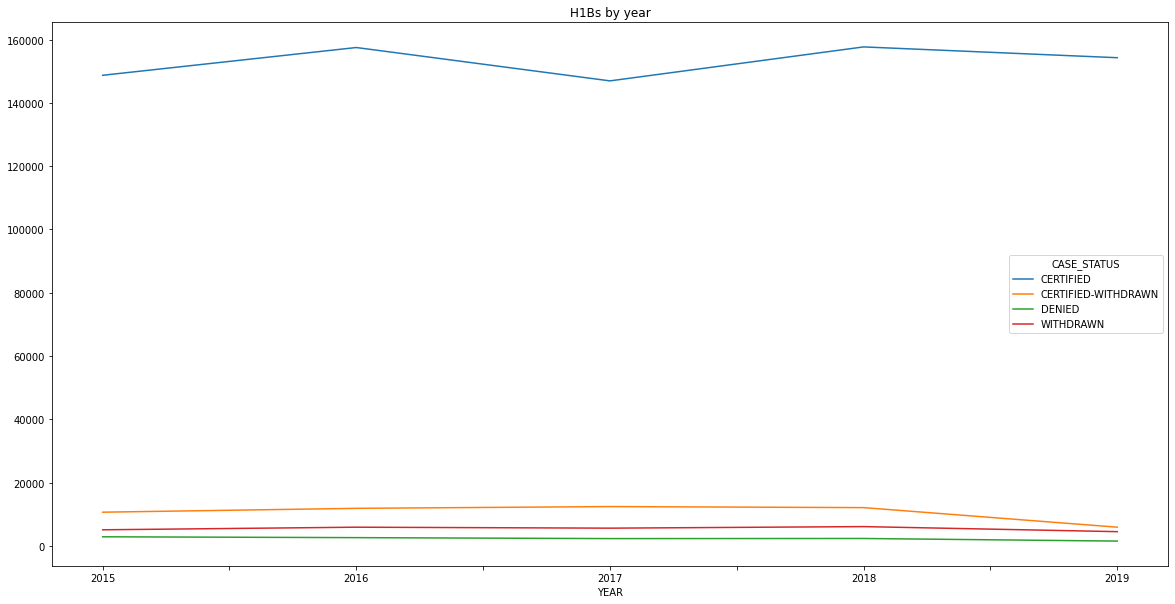

In [15]:
plt.rcParams["figure.figsize"] = (20,10)

pd.crosstab(data1.YEAR,data1.CASE_STATUS).plot(title='H1Bs by year')

Classificação de casos por ano (Desconsiderando casos certificados):

<AxesSubplot:title={'center':'H1Bs by year'}, xlabel='YEAR'>

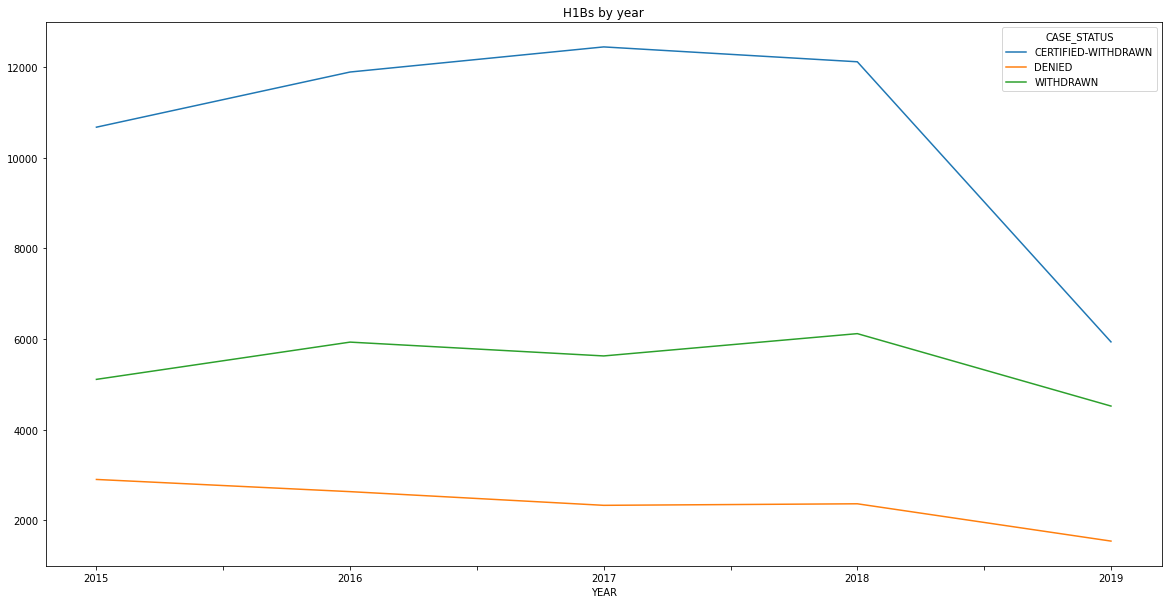

In [16]:
data1_minus_certified=data1[data1.CASE_STATUS!='CERTIFIED']
pd.crosstab(data1_minus_certified.YEAR,data1_minus_certified.CASE_STATUS).plot(title='H1Bs by year')

Quantidade de casos classificados por ano:

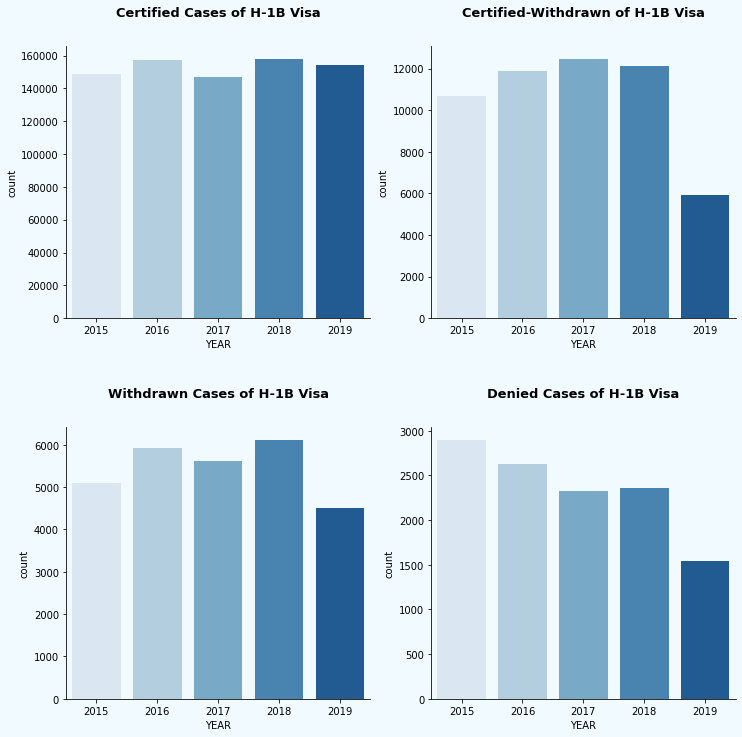

In [17]:
fig = plt.figure(figsize=(12,12))

fig.patch.set_facecolor('#F1FBFF')
fig.patch.set_alpha(1.0)

fig.tight_layout() 
fig.subplots_adjust(hspace=.4)

ax1 = plt.subplot(2,2,1)

ax1 = sns.countplot(x="YEAR", data=data1[data1['CASE_STATUS']=="CERTIFIED"], palette= "Blues")
ax1.patch.set_facecolor('#F1FBFF')

ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Certified Cases of H-1B Visa',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

ax2 = plt.subplot(2,2,2)

ax2 = sns.countplot(x="YEAR", data=data1[data1['CASE_STATUS']=="CERTIFIED-WITHDRAWN"], palette= "Blues")
ax2.patch.set_facecolor('#F1FBFF')

ax2 = plt.gca().spines['right'].set_visible(False)
ax2 = plt.gca().spines['top'].set_visible(False)
ax2 = plt.gca().spines['left'].set_visible(True)
ax2 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Certified-Withdrawn of H-1B Visa',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

ax3 = plt.subplot(2,2,3)

ax3 = sns.countplot(x="YEAR", data=data1[data1['CASE_STATUS']=="WITHDRAWN"], palette= "Blues")
ax3.patch.set_facecolor('#F1FBFF')

ax3 = plt.gca().spines['right'].set_visible(False)
ax3 = plt.gca().spines['top'].set_visible(False)
ax3 = plt.gca().spines['left'].set_visible(True)
ax3 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Withdrawn Cases of H-1B Visa',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

ax4 = plt.subplot(2,2,4)

ax4 = sns.countplot(x="YEAR", data=data1[data1['CASE_STATUS']=="DENIED"], palette= "Blues")
ax4.patch.set_facecolor('#F1FBFF')

ax4 = plt.gca().spines['right'].set_visible(False)
ax4 = plt.gca().spines['top'].set_visible(False)
ax4 = plt.gca().spines['left'].set_visible(True)
ax4 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Denied Cases of H-1B Visa',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

Casos certificados por estado (2015-2019):

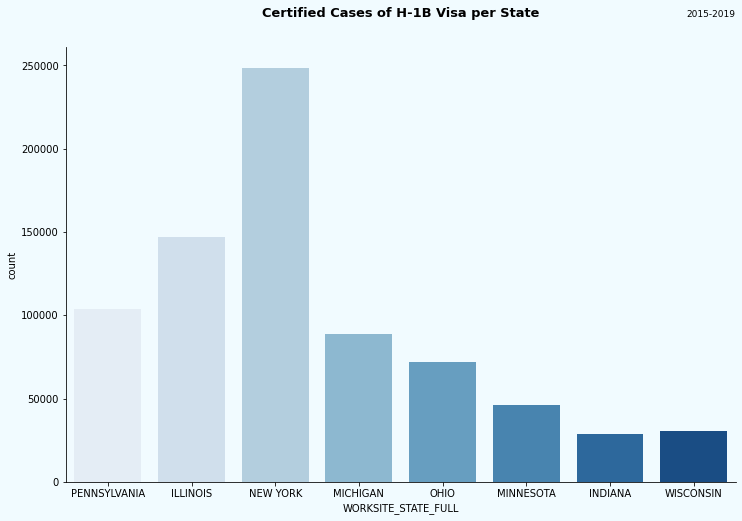

In [18]:
fig = plt.figure(figsize=(12,8))

fig.patch.set_facecolor('#F1FBFF')
fig.patch.set_alpha(1.0)

fig.tight_layout() 
fig.subplots_adjust(hspace=.4)

ax1 = sns.countplot(x="WORKSITE_STATE_FULL", data=data1[data1['CASE_STATUS']=="CERTIFIED"], palette= "Blues")
ax1.patch.set_facecolor('#F1FBFF')

ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)

plt.title('2015-2019', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Certified Cases of H-1B Visa per State',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

Quantidade de casos aprovados em cada estado por ano:

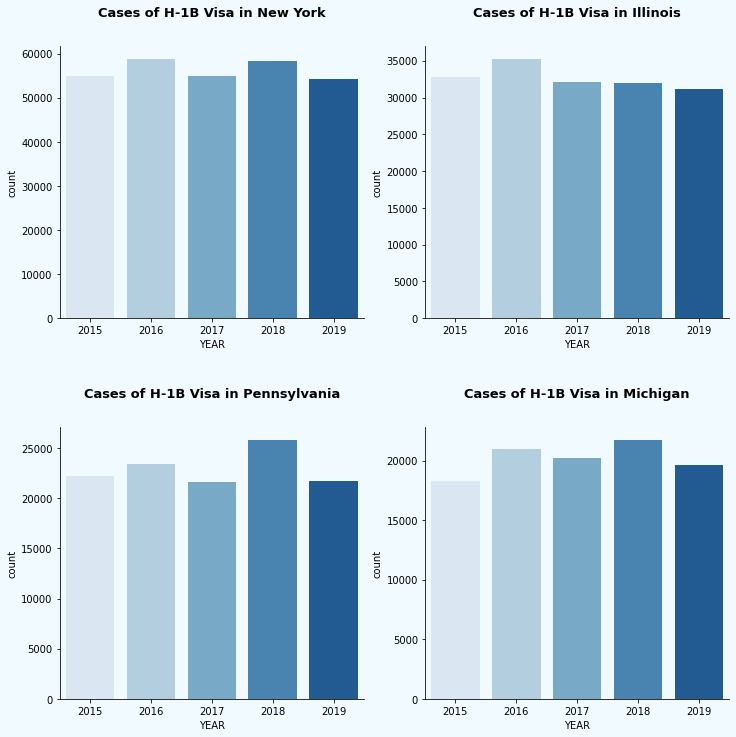

In [19]:
fig = plt.figure(figsize=(12,12))

fig.patch.set_facecolor('#F1FBFF')
fig.patch.set_alpha(1.0)

fig.tight_layout() 
fig.subplots_adjust(hspace=.4)

ax1 = plt.subplot(2,2,1)

ax1 = sns.countplot(x="YEAR", data=data1[data1['WORKSITE_STATE_FULL']=="NEW YORK"], palette= "Blues")
ax1.patch.set_facecolor('#F1FBFF')

ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Cases of H-1B Visa in New York',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

ax2 = plt.subplot(2,2,2)

ax2 = sns.countplot(x="YEAR", data=data1[data1['WORKSITE_STATE_FULL']=="ILLINOIS"], palette= "Blues")
ax2.patch.set_facecolor('#F1FBFF')

ax2 = plt.gca().spines['right'].set_visible(False)
ax2 = plt.gca().spines['top'].set_visible(False)
ax2 = plt.gca().spines['left'].set_visible(True)
ax2 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Cases of H-1B Visa in Illinois',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

ax3 = plt.subplot(2,2,3)

ax3 = sns.countplot(x="YEAR", data=data1[data1['WORKSITE_STATE_FULL']=="PENNSYLVANIA"], palette= "Blues")
ax3.patch.set_facecolor('#F1FBFF')

ax3 = plt.gca().spines['right'].set_visible(False)
ax3 = plt.gca().spines['top'].set_visible(False)
ax3 = plt.gca().spines['left'].set_visible(True)
ax3 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Cases of H-1B Visa in Pennsylvania',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

ax4 = plt.subplot(2,2,4)

ax4 = sns.countplot(x="YEAR", data=data1[data1['WORKSITE_STATE_FULL']=="MICHIGAN"], palette= "Blues")
ax4.patch.set_facecolor('#F1FBFF')

ax4 = plt.gca().spines['right'].set_visible(False)
ax4 = plt.gca().spines['top'].set_visible(False)
ax4 = plt.gca().spines['left'].set_visible(True)
ax4 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Cases of H-1B Visa in Michigan',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output


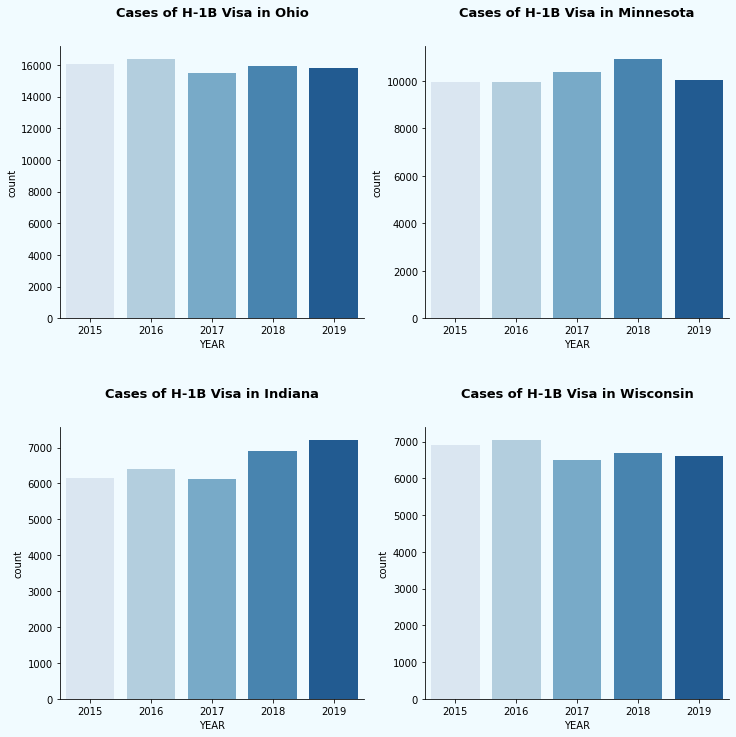

In [20]:
fig = plt.figure(figsize=(12,12))

fig.patch.set_facecolor('#F1FBFF')
fig.patch.set_alpha(1.0)

fig.tight_layout() 
fig.subplots_adjust(hspace=.4)

ax1 = plt.subplot(2,2,1)

ax1 = sns.countplot(x="YEAR", data=data1[data1['WORKSITE_STATE_FULL']=="OHIO"], palette= "Blues")
ax1.patch.set_facecolor('#F1FBFF')

ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Cases of H-1B Visa in Ohio',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output 


ax2 = plt.subplot(2,2,2)

ax2 = sns.countplot(x="YEAR", data=data1[data1['WORKSITE_STATE_FULL']=="MINNESOTA"], palette= "Blues")
ax2.patch.set_facecolor('#F1FBFF')

ax2 = plt.gca().spines['right'].set_visible(False)
ax2 = plt.gca().spines['top'].set_visible(False)
ax2 = plt.gca().spines['left'].set_visible(True)
ax2 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Cases of H-1B Visa in Minnesota',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output     


ax3 = plt.subplot(2,2,3)

ax3 = sns.countplot(x="YEAR", data=data1[data1['WORKSITE_STATE_FULL']=="INDIANA"], palette= "Blues")
ax3.patch.set_facecolor('#F1FBFF')

ax3 = plt.gca().spines['right'].set_visible(False)
ax3 = plt.gca().spines['top'].set_visible(False)
ax3 = plt.gca().spines['left'].set_visible(True)
ax3 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Cases of H-1B Visa in Indiana',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output 


ax4 = plt.subplot(2,2,4)

ax4 = sns.countplot(x="YEAR", data=data1[data1['WORKSITE_STATE_FULL']=="WISCONSIN"], palette= "Blues")
ax4.patch.set_facecolor('#F1FBFF')

ax4 = plt.gca().spines['right'].set_visible(False)
ax4 = plt.gca().spines['top'].set_visible(False)
ax4 = plt.gca().spines['left'].set_visible(True)
ax4 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Cases of H-1B Visa in Wisconsin',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output                           

20 empregos mais preenchidos:

<AxesSubplot:>

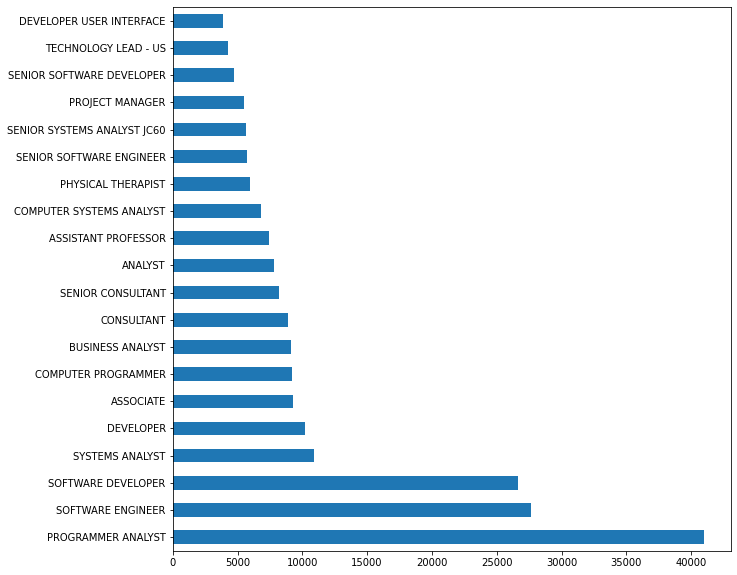

In [21]:
plt.figure(figsize = (10,10))
data1.JOB_TITLE.value_counts()[:20].plot(kind='barh')

20 empresas que contratam mais:

<AxesSubplot:>

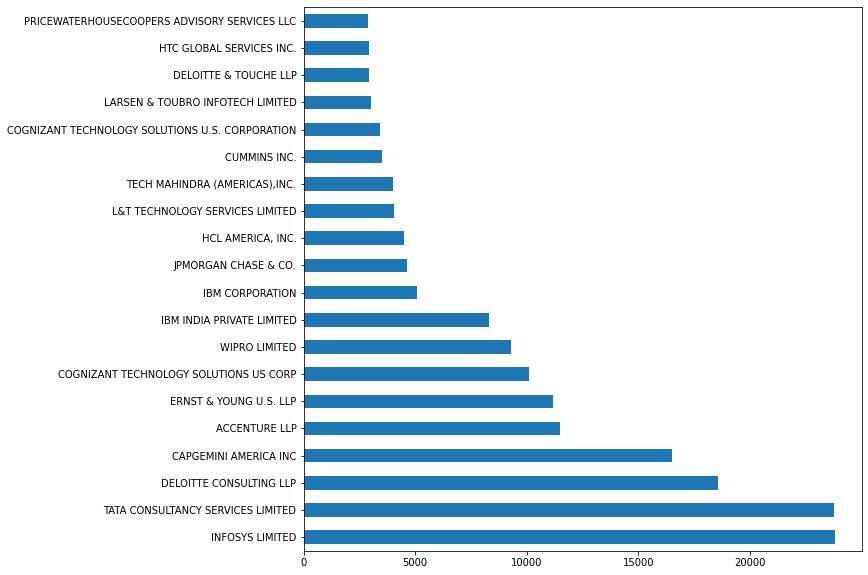

In [22]:
plt.figure(figsize = (10,10))
data1.EMPLOYER_NAME.value_counts()[:20].plot(kind='barh')

10 principais cargos nas 20 empresas que contratam mais:

<AxesSubplot:title={'center':'10 most common jobs of top 20 h1b companies'}, ylabel='JOB_TITLE'>

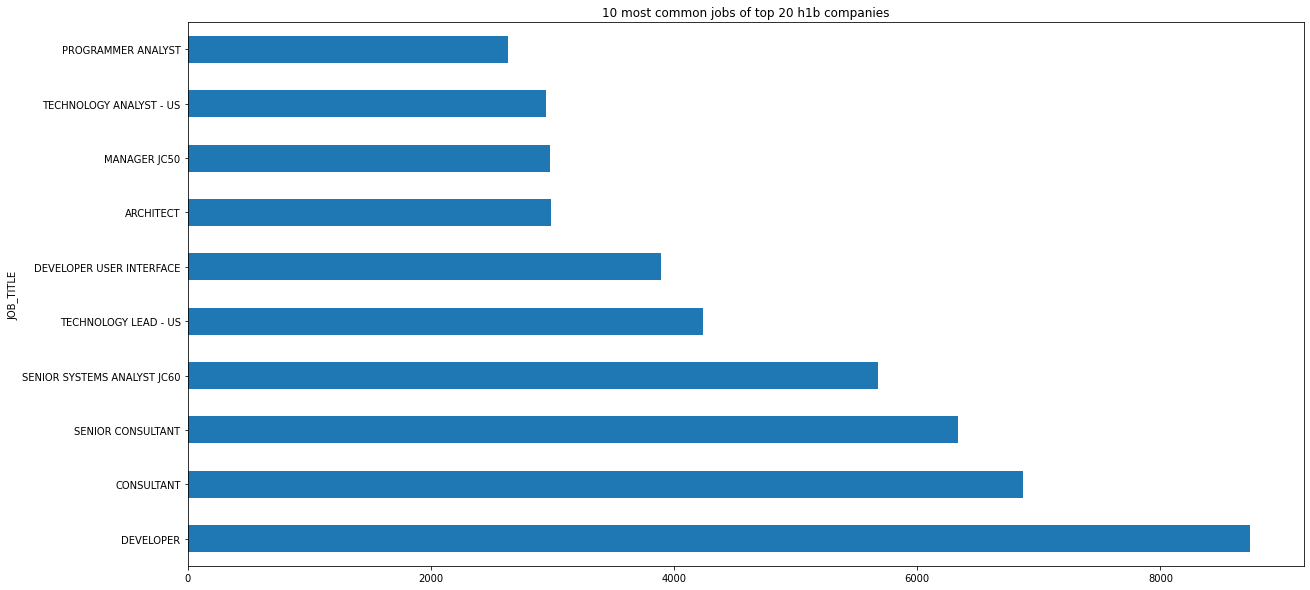

In [23]:
top_20=data1.groupby('EMPLOYER_NAME').CASE_STATUS.count().nlargest(20).index.tolist()
top_20_df=data1.loc[data1.EMPLOYER_NAME.isin(top_20)]
top_20_df.groupby('JOB_TITLE').EMPLOYER_NAME.count().nlargest(10).plot(kind='barh',title='10 most common jobs of top 20 h1b companies')

Maior e menor salários prevalecentes encontrados:

In [24]:
max_wage = data1['PREVAILING_WAGE'].max()
print(max_wage)

min_wage = data1['PREVAILING_WAGE'].min()
print(min_wage)

297785280.0
0.0


Comparação entre número de empregos de tempo integral ou meio período à aprovação do visto:

<AxesSubplot:ylabel='CASE_STATUS'>

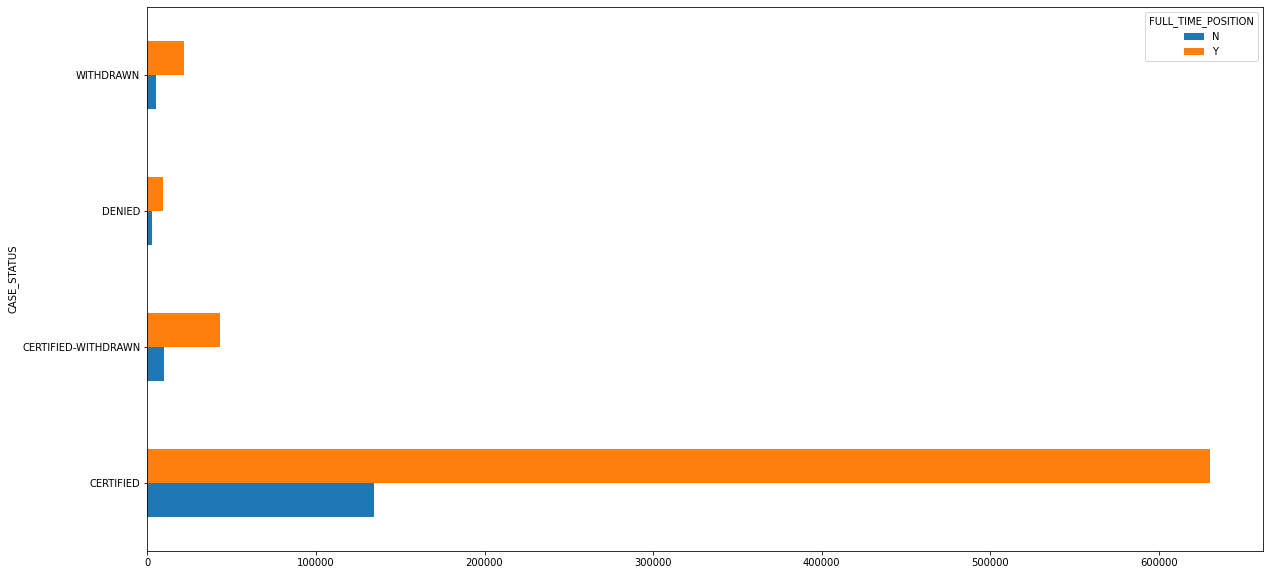

In [25]:
pd.crosstab(data1.CASE_STATUS,data1.FULL_TIME_POSITION).plot(kind='barh')

Comparação entre número de empregos de tempo integral ou meio período em relação ao tempo:

<AxesSubplot:title={'center':'Full time position over time'}, xlabel='YEAR'>

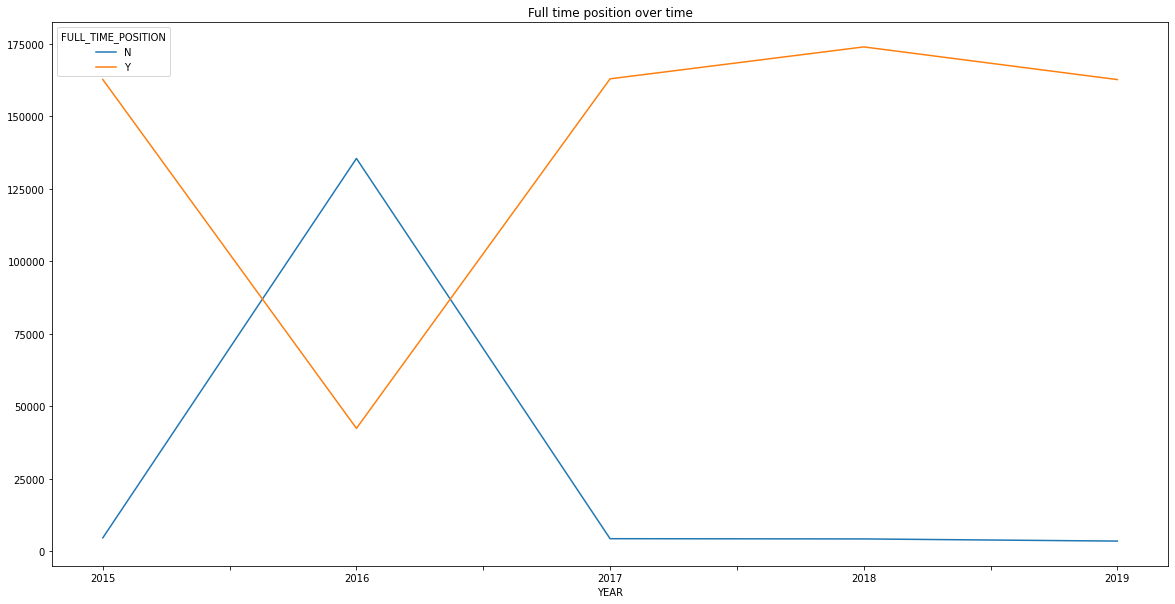

In [26]:
pd.crosstab(data1.YEAR,data1.FULL_TIME_POSITION).plot(title='Full time position over time')

Comparação entre o salário prevalecente dos empregados nos serviços de maior salário nas 20 empresas que contratam mais em comparação com os demais:

([], [])

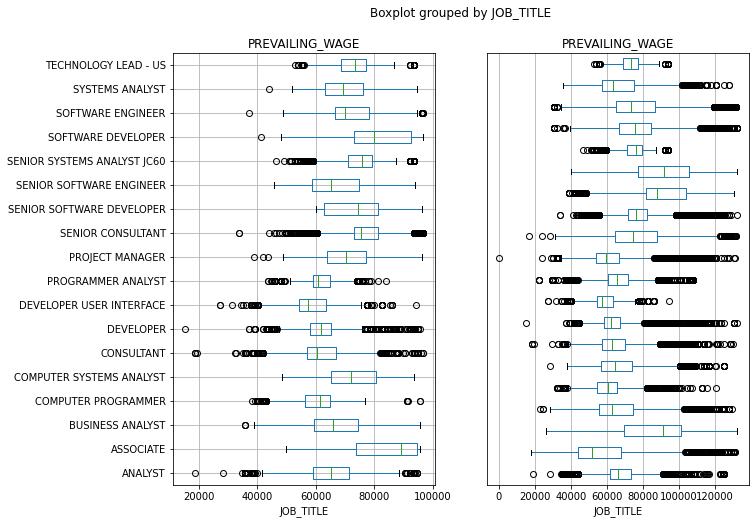

In [27]:
common_jobs=data1.groupby('JOB_TITLE').EMPLOYER_NAME.count().sort_values(ascending=False).index[0:20]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))


top_20_df_common_jobs=top_20_df[top_20_df.JOB_TITLE.isin(common_jobs)]
top_20_df_common_jobs=top_20_df_common_jobs[top_20_df_common_jobs.PREVAILING_WAGE<=top_20_df_common_jobs.PREVAILING_WAGE.quantile(0.99)]
top_20_df_common_jobs.boxplot(column='PREVAILING_WAGE',by='JOB_TITLE',vert=False,ax=axes[0])
data1_common_jobs=data1[data1.JOB_TITLE.isin(common_jobs)]
data1_common_jobs=data1_common_jobs[data1_common_jobs.PREVAILING_WAGE<=data1_common_jobs.PREVAILING_WAGE.quantile(0.99)]

data1_common_jobs.boxplot(column='PREVAILING_WAGE',by='JOB_TITLE',vert=False,ax=axes[1])
plt.yticks([])


Comparação entre o salário prevalecente dos empregados nos serviços de maior salário nas 20 empresas que contratam mais em relação ao tempo:

<AxesSubplot:title={'center':'Prevailing wage of the Top 20 x Other companies'}, xlabel='YEAR'>

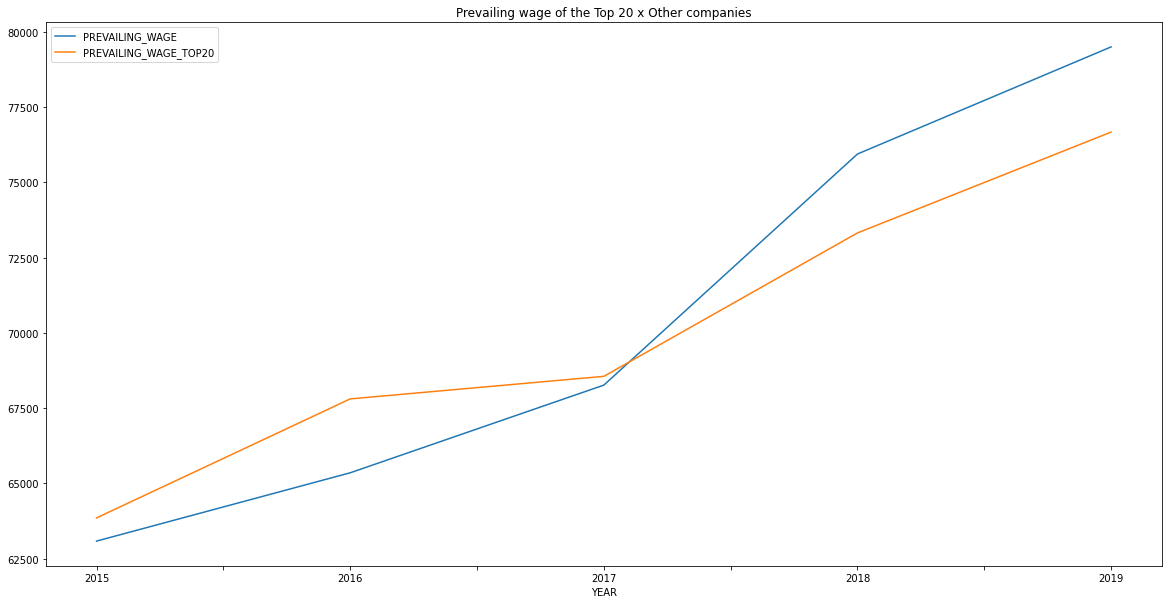

In [28]:
one=data1.groupby('YEAR').PREVAILING_WAGE.median()
two=top_20_df.groupby('YEAR').PREVAILING_WAGE.median()
one=pd.DataFrame(one)
one['PREVAILING_WAGE_TOP20']=two

one.plot(title='Prevailing wage of the Top 20 x Other companies')